<a href="https://colab.research.google.com/github/Tamoziit/Data-Mining/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**K-Means Clustering**

In [ ]:
class KMeans:
    def __init__(self, k=3, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance

    def fit(self, X):
        np.random.seed(42)
        # Randomly initializing k centroids from data points
        random_indices = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iters):
            # Assigning points to nearest centroid
            clusters = self.create_clusters(X)

            # Computing new centroids
            new_centroids = np.array([
                np.mean(X[cluster], axis=0) if len(cluster) > 0 else self.centroids[idx]
                for idx, cluster in enumerate(clusters)
            ])

            # Checking convergence
            diff = np.linalg.norm(self.centroids - new_centroids)
            if diff < self.tolerance:
                print(f"Converged at iteration {i+1}")
                break

            self.centroids = new_centroids

        # Assigning final labels
        self.labels_ = np.empty(len(X))
        for cluster_idx, cluster in enumerate(clusters):
            for index in cluster:
                self.labels_[index] = cluster_idx

    def create_clusters(self, X):
        clusters = [[] for _ in range(self.k)]
        for idx, point in enumerate(X):
            centroid_idx = self.closest_centroid(point)
            clusters[centroid_idx].append(idx)
        return clusters

    def closest_centroid(self, point):
        distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]
        return np.argmin(distances)

    def predict(self, X):
        return np.array([self.closest_centroid(point) for point in X])

*Dataset - 1*

In [27]:
df = pd.read_csv("/content/Dataset_1 - Dataset_1.csv")

print(df)

     Unnamed: 0        x1        x2  y
0             0  4.475986  1.610147  1
1             1  0.309710  2.789669  1
2             2  4.398344  3.946847  1
3             3 -0.660853  2.801566  1
4             4  4.044945  4.343379  1
..          ...       ...       ... ..
295         295 -4.833995 -3.370943  3
296         296  1.098572 -7.180859  3
297         297 -1.940677 -1.561840  3
298         298 -2.365609 -5.799213  3
299         299 -3.043808 -1.863421  3

[300 rows x 4 columns]


In [28]:
X = df[['x1', 'x2']].values
k = 3

kmeans = KMeans(k=k)
kmeans.fit(X)

Converged at iteration 11


In [29]:
df['cluster'] = kmeans.labels_
print(df.head())

   Unnamed: 0        x1        x2  y  cluster
0           0  4.475986  1.610147  1      0.0
1           1  0.309710  2.789669  1      2.0
2           2  4.398344  3.946847  1      2.0
3           3 -0.660853  2.801566  1      2.0
4           4  4.044945  4.343379  1      2.0


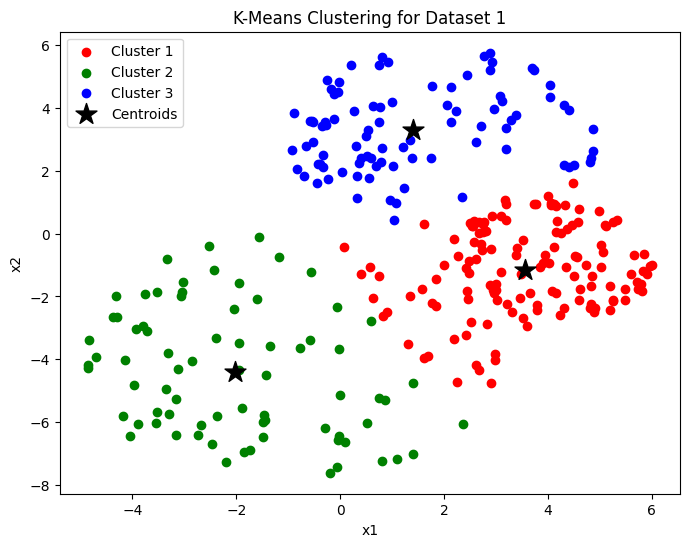

In [30]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']

for cluster_id in range(k):
    cluster_points = X[df['cluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[cluster_id % len(colors)], label=f'Cluster {cluster_id+1}')

# Plotting centroids
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            s=250, marker='*', c='black', label='Centroids')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-Means Clustering for Dataset 1')
plt.legend()
plt.show()

*Dataset - 2*

In [22]:
df = pd.read_csv("/content/Dataset_2 - Dataset_2.csv")

print(df)

     Unnamed: 0        x1        x2  y
0             0  0.004419 -0.321069  1
1             1  0.142936  1.701657  1
2             2 -1.571848 -0.085874  1
3             3  0.666752 -0.240567  1
4             4  0.690767  1.058377  1
..          ...       ...       ... ..
695         695  5.128319  0.018828  2
696         696 -5.481951  0.462713  2
697         697 -2.661955  2.641230  2
698         698 -3.691998 -2.410554  2
699         699 -3.467581 -3.249313  2

[700 rows x 4 columns]


In [23]:
X = df[['x1', 'x2']].values
k = 3

kmeans = KMeans(k=k)
kmeans.fit(X)

Converged at iteration 28


In [24]:
df['cluster'] = kmeans.labels_
print(df.head())

   Unnamed: 0        x1        x2  y  cluster
0           0  0.004419 -0.321069  1      0.0
1           1  0.142936  1.701657  1      2.0
2           2 -1.571848 -0.085874  1      0.0
3           3  0.666752 -0.240567  1      1.0
4           4  0.690767  1.058377  1      1.0


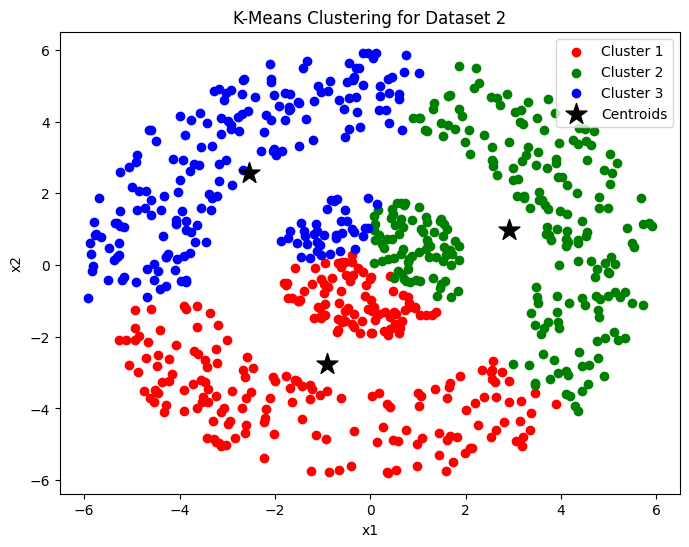

In [25]:
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']

for cluster_id in range(k):
    cluster_points = X[df['cluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[cluster_id % len(colors)], label=f'Cluster {cluster_id+1}')

plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            s=250, marker='*', c='black', label='Centroids')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-Means Clustering for Dataset 2')
plt.legend()
plt.show()

In [ ]:
!pip install pypandoc

In [ ]:
!apt-get install -y pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [31]:
import pypandoc
pypandoc.convert_file("K_Means_Clustering.ipynb", "docx", outputfile="K_Means_Clustering.docx")

''